In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
arr = np.linspace(1, 10, 10, dtype='int')
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
li = list(range(1, 11))
li

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
li_2 = []
for i in li:
    li_2.append(i + 2)
li_2

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [6]:
arr + 2

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### Hyperparameters
- Parameters (Arguments): Tham số đầu vào của traditional functions 
- Model parameters: Weights
- Hyperparameters: Siêu tham để tinh chỉnh mô hình machine learning

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDvt9r6rvskLqARBImJvdcg1ck2jM9_8toU7XJGTCuO1WZTHWXQ430lDVGK3d5_DlvZmY&usqp=CAU)

In [8]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [9]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']
df = df[cols]

In [12]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,6.7,196
1,2.4,4,7.7,221
2,1.5,4,5.8,136
3,3.5,6,9.1,255
4,3.5,6,8.7,244
...,...,...,...,...
1062,3.0,6,9.8,271
1063,3.2,6,9.5,264
1064,3.0,6,9.8,271
1065,3.2,6,9.3,260


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='CO2EMISSIONS'), df.CO2EMISSIONS, 
                                                    test_size=0.15, shuffle=True, random_state=4)

In [15]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [16]:
X_train.shape, X_test.shape

((906, 3), (161, 3))

CO2EMISSIONS = theta_1 * ENGINESIZE + theta_2 * CYLINDERS + theta_3 * FUELCONSUMPTION_HWY + theta_0*1

In [18]:
X_train['BIAS'] = 1
X_test['BIAS'] = 1

In [109]:
learning_rate = 0.001
theta = np.random.random(X_train.shape[1])

n = X_train.shape[0]
errors = []
# for k in range(20):
index = 0
while True:
    index += 1
    for i in range(theta.shape[0]):
        
        error = ((theta * X_train).sum(axis=1) - y_train)
        theta[i] = theta[i] - learning_rate * (1/ n) * (error * X_train.iloc[:, i]).sum()
    
    predicted = (theta * X_train).sum(axis=1)
    mse = ((predicted - y_train)**2).sum() / n
    errors.append(mse)
    
    if index%5 ==0:
        print(errors[-1])
    
    if index > 4:
        if errors[index -3] - errors[index - 1] < 100:
            break

14614.675177618572
3879.7635137813536
1531.3759532581012
1016.9916495236262


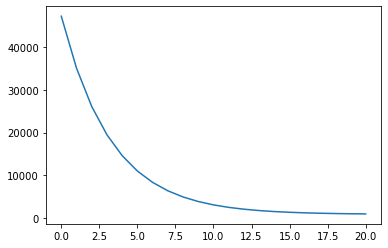

In [110]:
plt.plot(errors);

In [84]:
predicted = theta[0] * X_test.ENGINESIZE + theta[1] * X_test.CYLINDERS + theta[2]*X_test.FUELCONSUMPTION_HWY + theta[3]

In [85]:
predicted.head(5)

834    245.225334
66     200.988904
983    242.325365
849    253.641688
110    276.578534
dtype: float64

In [86]:
predicted = (theta * X_test).sum(axis=1)

In [87]:
pd.DataFrame({'actual': y_test, 'predicted': predicted})

,actual,predicted
834,262,245.225334
66,237,200.988904
983,258,242.325365
849,271,253.641688
110,292,276.578534
...,...,...
336,179,166.423113
604,193,168.656551
322,168,148.640319
30,258,229.417279
